# <font color=blue>**PROYECTO** - Modelos Predictivos de Regresión Lineal Uni-Variable Sencillos</font>

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
#●	Usando sclicing con NumPy separar los datos en 2 datasets
PreciosCasas = np.load('proyecto_training_data.npy')
DatosEntrenamiento = PreciosCasas[0:int(PreciosCasas.shape[0]*.8)+1]
DatosValidacionPrueba = PreciosCasas[int(PreciosCasas.shape[0]*.8)+1:]
#print(DatosEntrenamiento)
#print(DatosValidacionPrueba.shape)

## ●	Análisis exploratorio de datos

In [302]:
#○	Para cada variable en el dataset calcular((usando numpy o pandas):
#   ■	media
#   ■	valor máximo
#   ■	valor mínimo 
#   ■	rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
#   ■	desviación estándar 
AnalisisExploratorio = np.array([0,0,0,0,0])
for i in range(DatosEntrenamiento.shape[1]):
    VarMedia = np.mean(DatosEntrenamiento[i])
    VarMax = np.max(DatosEntrenamiento[i])
    VarMin = np.min(DatosEntrenamiento[i])
    VarPeak = np.ptp(DatosEntrenamiento[i])
    VarDesv = np.std(DatosEntrenamiento[i])
    
    print('VARIABLE '+ str(i+1))
    print('Media               ->' + str(VarMedia))
    print('Max                 ->' + str(VarMax))
    print('Min                 ->' + str(VarMin))
    print('Rango               ->' + str(VarPeak))
    print('Desviacion Estandar ->' + str(VarDesv))
    info = np.array([VarMedia,VarMax,VarMin,VarPeak,VarDesv])
    AnalisisExploratorio = np.vstack((AnalisisExploratorio, info))

VARIABLE 1
Media               ->35239.833333333336
Max                 ->208500.0
Min                 ->7.0
Rango               ->208493.0
Desviacion Estandar ->77487.55164845655
VARIABLE 2
Media               ->30805.0
Max                 ->181500.0
Min                 ->6.0
Rango               ->181494.0
Desviacion Estandar ->67396.91578254898
VARIABLE 3
Media               ->37750.333333333336
Max                 ->223500.0
Min                 ->6.0
Rango               ->223494.0
Desviacion Estandar ->83072.83863106053
VARIABLE 4
Media               ->23825.0
Max                 ->140000.0
Min                 ->7.0
Rango               ->139993.0
Desviacion Estandar ->51959.616841671705
VARIABLE 5
Media               ->42207.666666666664
Max                 ->250000.0
Min                 ->8.0
Rango               ->249992.0
Desviacion Estandar ->92930.43587663959
VARIABLE 6
Media               ->24314.0
Max                 ->143000.0
Min                 ->5.0
Rango               ->1

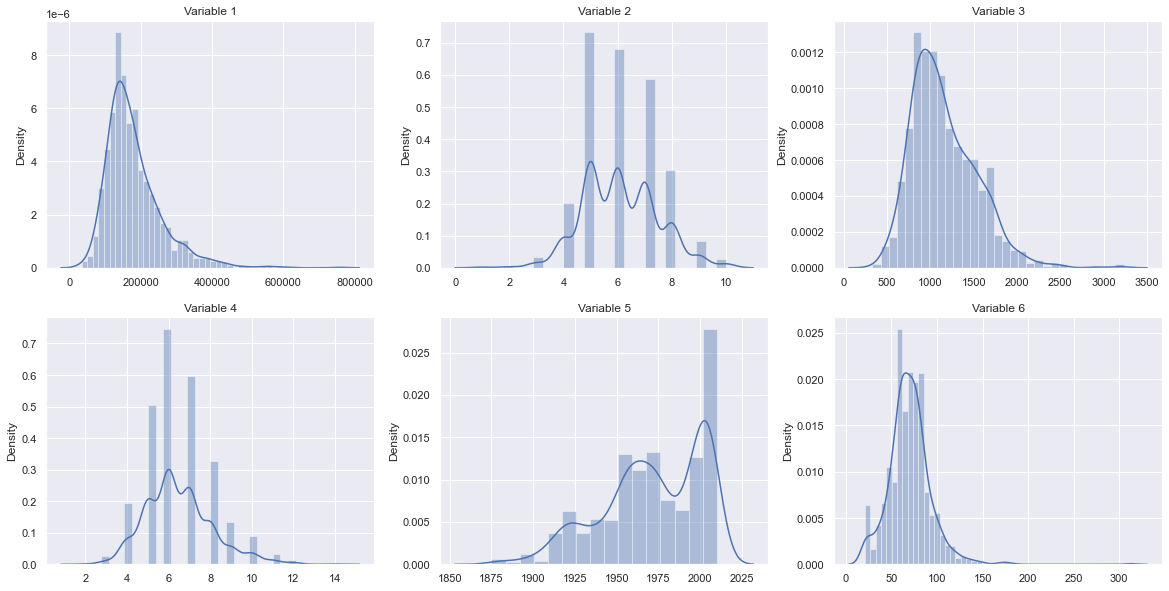

In [303]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#○	Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  
#para graficar  un histograma de la variable.
#%matplotlib inline

sns.set_theme();
fig, eje = plt.subplots(2, 3,figsize=(20, 10))
eje[0,0].set_title('Variable 1')
sns.distplot(DatosEntrenamiento[:,0],ax=eje[0,0]) 
eje[0,1].set_title('Variable 2')
sns.distplot(DatosEntrenamiento[:,1],ax=eje[0,1])
eje[0,2].set_title('Variable 3')
sns.distplot(DatosEntrenamiento[:,2],ax=eje[0,2])
eje[1,0].set_title('Variable 4')
sns.distplot(DatosEntrenamiento[:,3],ax=eje[1,0])
eje[1,1].set_title('Variable 5')
sns.distplot(DatosEntrenamiento[:,4],ax=eje[1,1])
eje[1,2].set_title('Variable 6')
sns.distplot(DatosEntrenamiento[:,5],ax=eje[1,2])
plt.show()


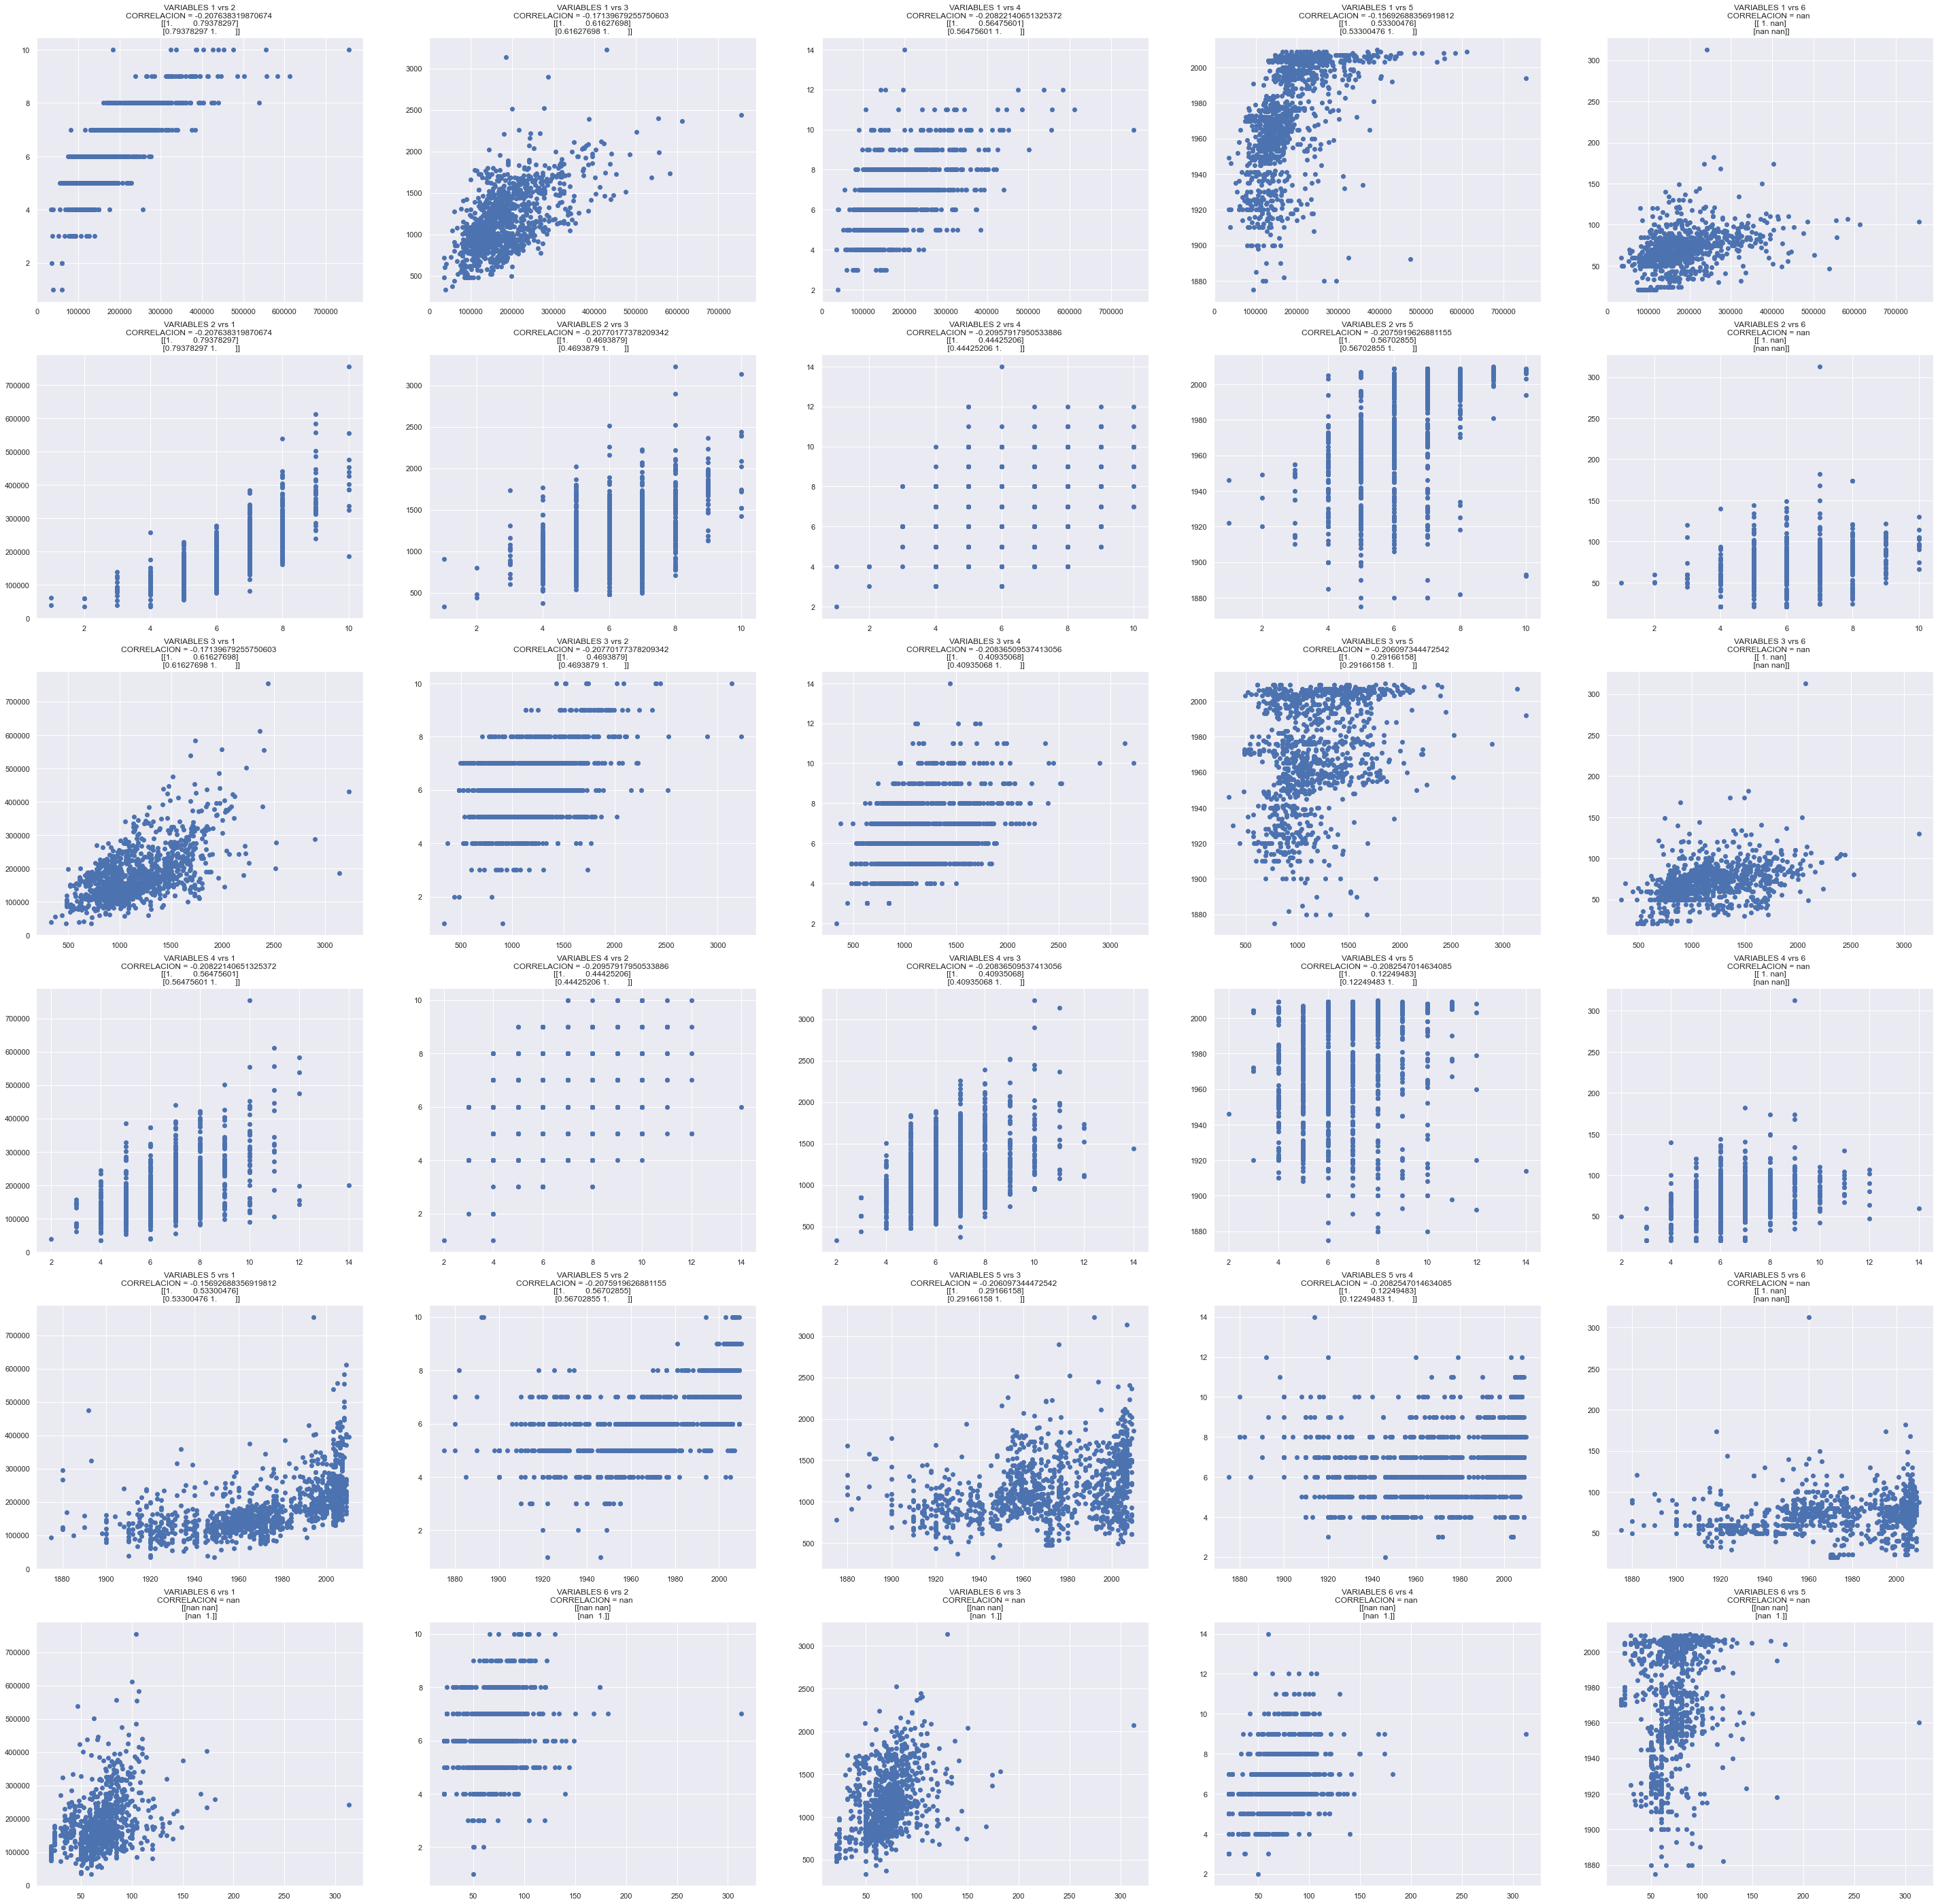

In [305]:
#●	Para cada variable independiente x :
#   ○	Calcular el coeficiente de correlación entre x y y
#   ○	graficar x vs y(scatterplot) usando matplotlib
#   ○	Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 
#●	Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo (la 2 que presentan mayor correlación).

TotVarX = DatosEntrenamiento.shape[1]
TotFilas = int((TotVarX*TotVarX-TotVarX)/5)
AE = AnalisisExploratorio[1:]
fig2, eje2 = plt.subplots(TotFilas, 5,figsize=(50, 50))

for i in range(TotVarX):
    VarY = 0
    for j in range(TotVarX):
        if(i==VarY):
            VarY+=1
        if VarY==6:
            break
        #print('-'+str(i)+'-->'+str(VarY))        
        D1 = DatosEntrenamiento[:,i]
        D2 = DatosEntrenamiento[:,VarY]
        M1 = AE[i][0]
        M2 = AE[VarY][0]
        DS1 = AE[i][4]
        DS2 = AE[VarY][4]
        Covarianza = ((np.sum(D1*D2)/DatosEntrenamiento[:,i].shape[0]) - (M1 * M2))
        R =Covarianza/(DS1 * DS2)
        CofCor = np.corrcoef(DatosEntrenamiento[:,i],DatosEntrenamiento[:,VarY])
        #print('  R    ' + str(R))
        #print('-------------------------------------------------')
           
        eje2[i,j].set_title('VARIABLES '+str(i+1)+' vrs '+str(VarY+1) +'\nCORRELACION = '+str(R) +' \n' + str(CofCor))
        eje2[i,j].scatter(DatosEntrenamiento[:,i],DatosEntrenamiento[:,VarY]) 
        VarY+=1    
plt.show()

In [306]:
DatosEntrenamiento[:,0]

array([208500., 181500., 223500., ..., 245350., 173000., 235000.])

In [307]:
#●	Crear una función para entrenar un modelo de regresión lineal de una variable 
#   y = mx +b.
#   La función recibe como argumentos:
#   ○	vector con  la variable independiente “x” ,  
#   ○	vector con la variable dependiente “y”,  
#   ○	un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
#   ○	un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
#   ○	escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

def ModeloRegresionLineal(VecX,VecY,epochs,imprimir_error_cada,learning_rate):

    Matriz1 = np.asmatrix(np.column_stack((VecX,np.ones_like(VecX))))
    Parametro_mb = np.array([[0],[0]])
    Error = {}
    ErrorA = np.array([0])
    Modelo = {}
    cont = 1
    for i in range (epochs):
        Yhat = np.matmul(Matriz1,Parametro_mb)    
        VecY = np.reshape(VecY,(VecY.shape[0],1))
        ErrorYhat = np.average((np.power(VecY-Yhat,2)))*1/2
        Error[str(i)] = np.array([ErrorYhat])
        ErrorA = np.vstack((ErrorA,np.array([ErrorYhat])))
        
        GradienteP = np.average(np.multiply((Yhat-VecY),Matriz1), axis=0)
        GradienteP = np.reshape(GradienteP,(GradienteP.shape[1],GradienteP.shape[0]))
        Parametro_mb = (Parametro_mb - GradienteP*learning_rate)
        Modelo[str(i)] = Parametro_mb
        
        if(cont==imprimir_error_cada):       
            print("ITERACION " + str(i+1))
            print("Error = ", ErrorYhat)
            cont=1
        else:
            cont+=1
                 
    return(Modelo,ErrorA[1:])


In [309]:
#●	Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por 
#   la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración:
def Error_Tiempo(Error):
    plt.title("Cambio de el error en el tiempo")
    plt.xlabel('Iteracion')
    plt.ylabel('Error')
    plt.plot(Error)  
    plt.show

ITERACION 5
Error =  666.7752396891116
ITERACION 10
Error =  597.0218999895303
ITERACION 15
Error =  596.9598101327481
ITERACION 20
Error =  596.9551722003256


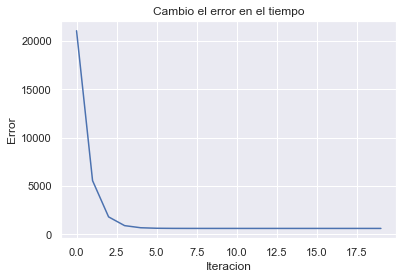

In [314]:
ResultadoModelo = ModeloRegresionLineal(np.array([65,80,68]),np.array([208.5,181.5,223.5]),20,5,0.0001)
Error_Tiempo(ResultadoModelo[1])